In [25]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shriyashjagtap/e-commerce-customer-for-behavior-analysis")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\sheet\.cache\kagglehub\datasets\shriyashjagtap\e-commerce-customer-for-behavior-analysis\versions\4


In [26]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA

In [27]:
dataset=pd.read_csv('ecommerce_customer_data_custom_ratios.csv.zip')
dataset

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,0
2,46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,37,Male,0
3,46251,2020-11-12 13:13:29,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,37,Male,0
4,13593,2020-11-27 17:55:11,Home,449,1,3452,Credit Card,49,0.0,James Grant,49,Female,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,33308,2023-08-10 13:39:06,Clothing,279,2,2187,PayPal,55,1.0,Michelle Flores,55,Male,1
249996,48835,2021-11-23 01:30:42,Home,27,1,3615,Credit Card,42,1.0,Jeremy Rush,42,Female,1
249997,21019,2020-07-02 14:04:48,Home,17,5,2466,Cash,41,0.0,Tina Craig,41,Male,0
249998,49234,2020-12-30 02:02:40,Books,398,2,3668,Crypto,34,0.0,Jennifer Cooper,34,Female,1


In [28]:
# 1. Handling Null Values
# Check for null values
print("Missing values before handling:\n", dataset.isnull().sum())

# Impute numerical features with mean and categorical with mode
numerical_features = dataset.select_dtypes(include=['int64', 'float64']).columns
categorical_features = dataset.select_dtypes(include=['object']).columns

# Imputation for numerical features
num_imputer = SimpleImputer(strategy='mean')
dataset[numerical_features] = num_imputer.fit_transform(dataset[numerical_features])

# Imputation for categorical features
cat_imputer = SimpleImputer(strategy='most_frequent')
dataset[categorical_features] = cat_imputer.fit_transform(dataset[categorical_features])

#display missing values after handling data 
print("Missing values after handling:\n", dataset.isnull().sum())
 


Missing values before handling:
 Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returns                  47596
Customer Name                0
Age                          0
Gender                       0
Churn                        0
dtype: int64
Missing values after handling:
 Customer ID              0
Purchase Date            0
Product Category         0
Product Price            0
Quantity                 0
Total Purchase Amount    0
Payment Method           0
Customer Age             0
Returns                  0
Customer Name            0
Age                      0
Gender                   0
Churn                    0
dtype: int64


In [29]:
# 2. Data Reduction
# a) Remove Low-Variance Features
# Variance threshold can be set lower based on the dataset (e.g., 0.01)
var_threshold = VarianceThreshold(threshold=0.01)
dataset_reduced = var_threshold.fit_transform(dataset[numerical_features])

# b) PCA for Dimensionality Reduction (optional, depending on dataset size and need)
# Set n_components based on the desired level of explained variance (e.g., 0.95 for 95%)
pca = PCA(n_components=0.95)
dataset_pca = pca.fit_transform(dataset_reduced)

In [ ]:
# 3. Discretization
# Apply KBinsDiscretizer for continuous features (e.g., 4 bins with 'uniform' or 'quantile' strategy)
discretizer = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')
discretized_features = discretizer.fit_transform(dataset[numerical_features])

# Convert the discretized array back to a DataFrame and concatenate with original dataset
discretized_df = pd.DataFrame(discretized_features, columns=[f'{col}_bin' for col in numerical_features])
dataset = pd.concat([dataset, discretized_df], axis=1)

# Standardizing numerical features 
scaler = StandardScaler()
dataset[numerical_features] = scaler.fit_transform(dataset[numerical_features])


C:\Users\sheet\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


DATA VISUALISATION

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# General settings
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

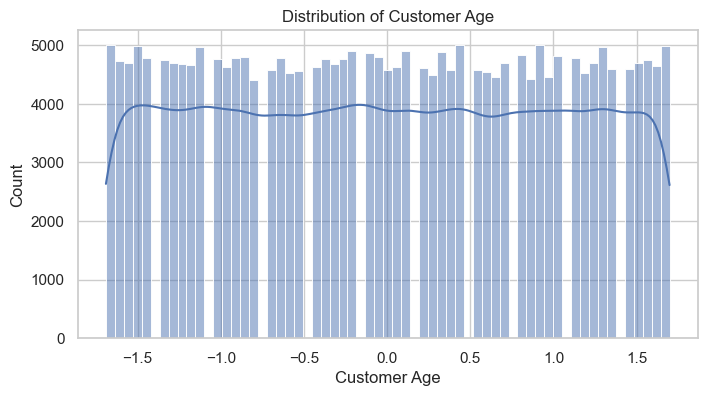

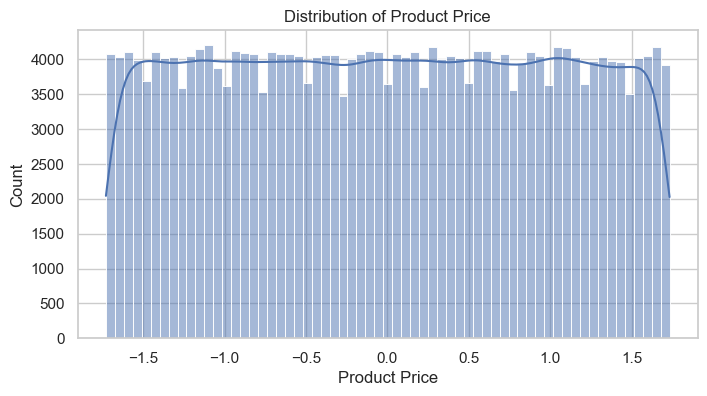

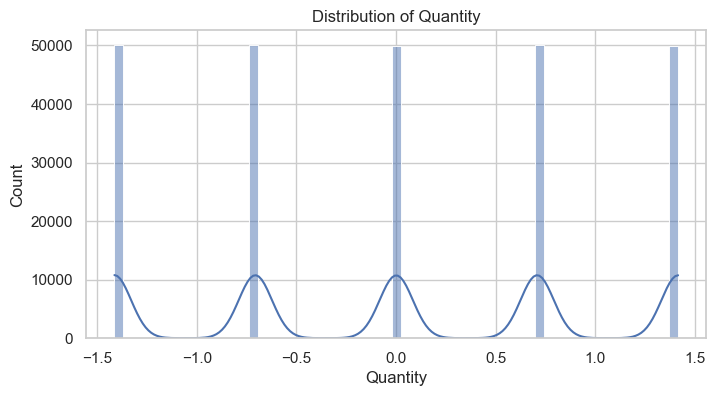

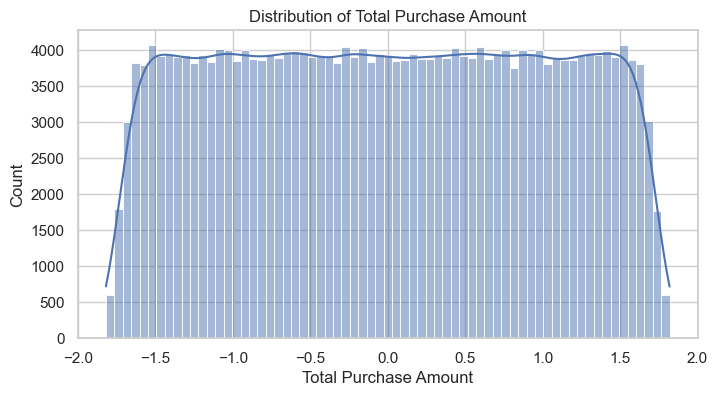

In [32]:
# 1. Histograms for numerical columns
numerical_cols = ['Customer Age', 'Product Price', 'Quantity', 'Total Purchase Amount']
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(dataset[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

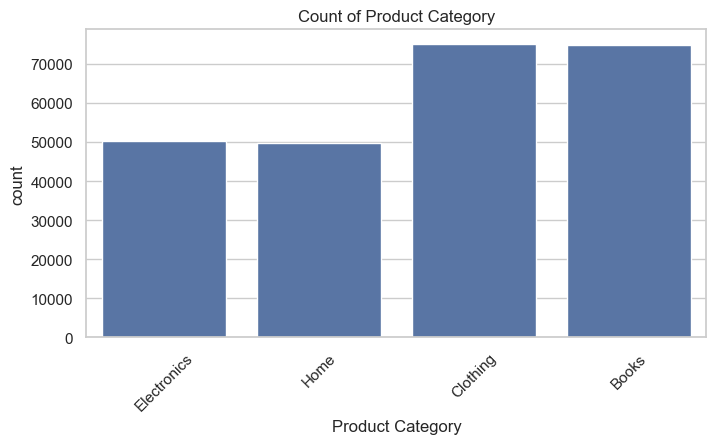

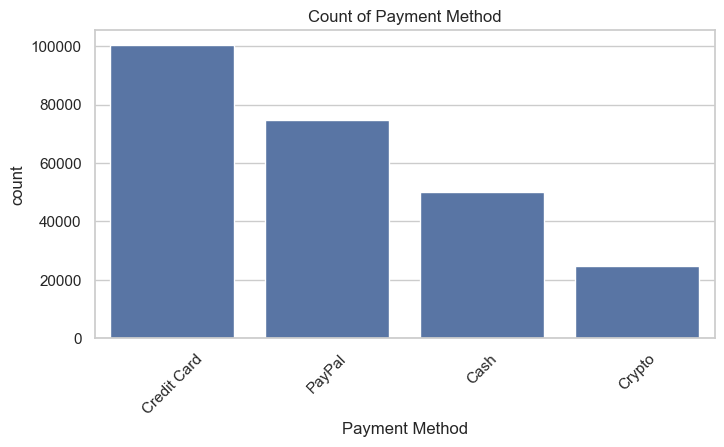

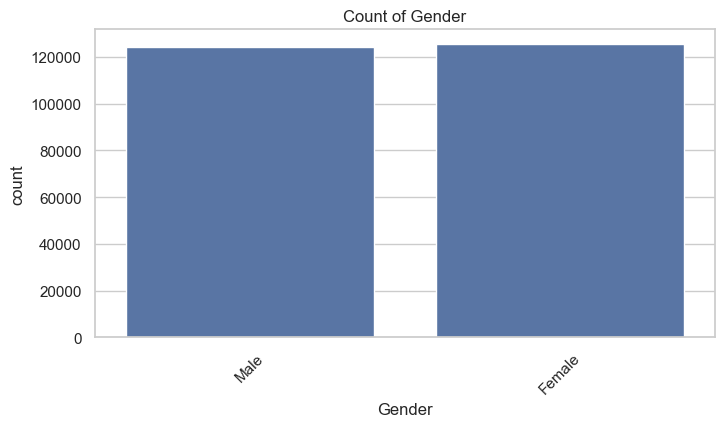

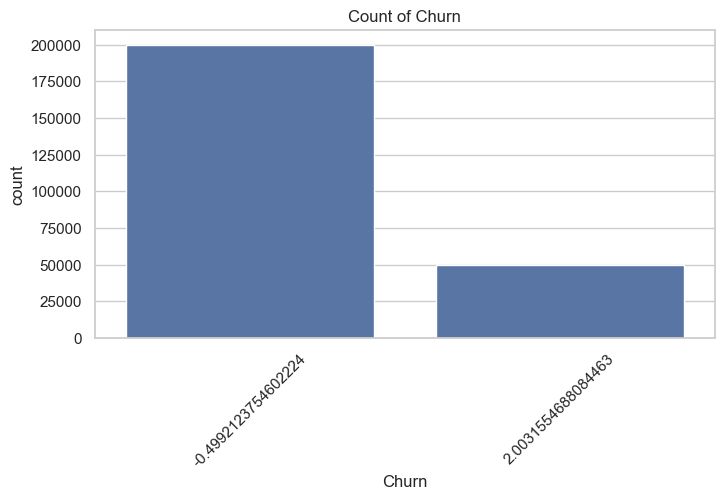

In [37]:
# 2. Bar plots for categorical columns
categorical_cols = ['Product Category', 'Payment Method', 'Gender', 'Churn']
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=dataset, x=col)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.show()

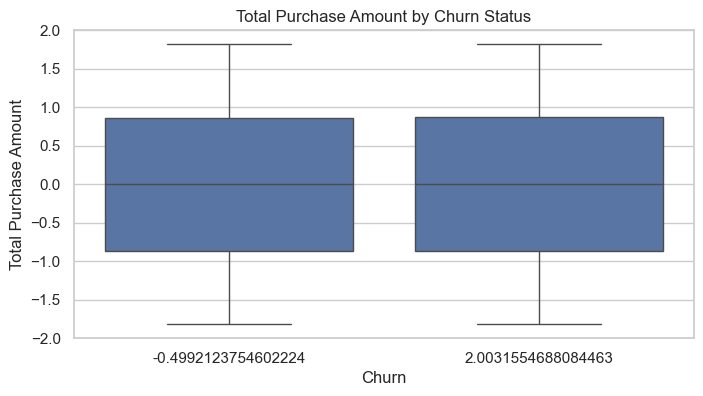

In [34]:
# 3. Customer churn vs. Total Purchase Amount
plt.figure(figsize=(8, 4))
sns.boxplot(data=dataset, x='Churn', y='Total Purchase Amount')
plt.title('Total Purchase Amount by Churn Status')
plt.show()

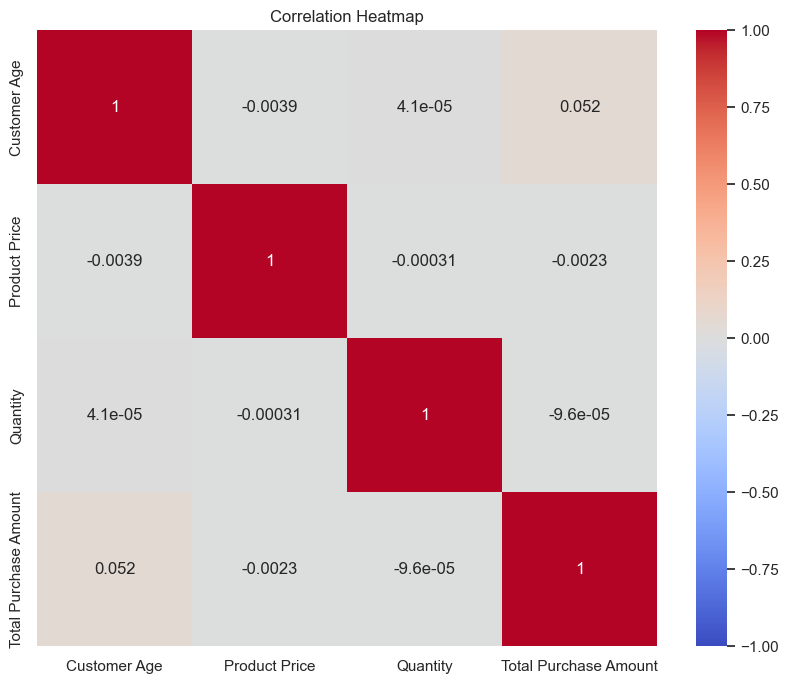

In [14]:
# 4. Correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(dataset[numerical_cols].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


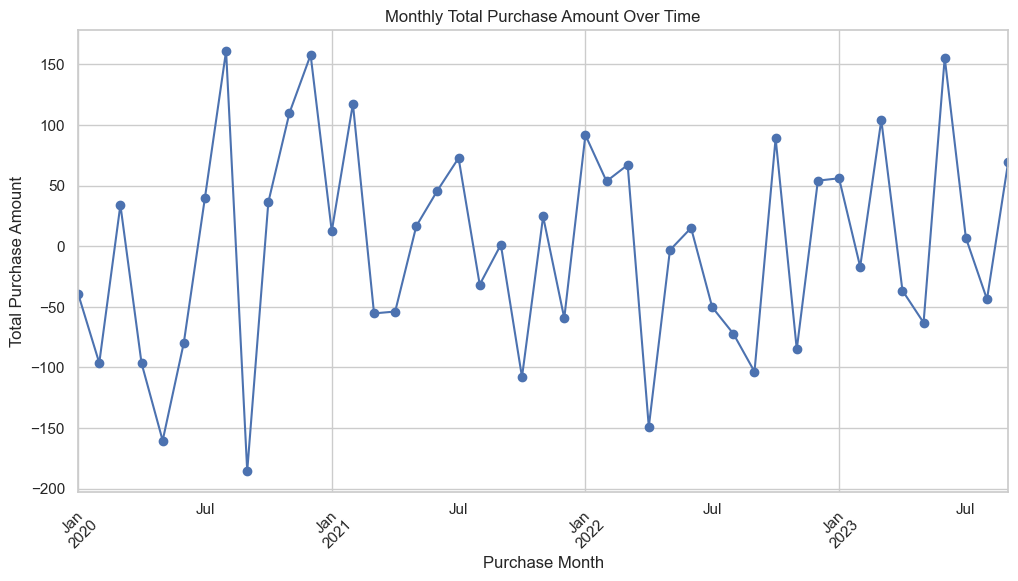

In [15]:
# 5. Time-based analysis
dataset['Purchase Date'] = pd.to_datetime(dataset['Purchase Date'])
dataset['Purchase Month'] = dataset['Purchase Date'].dt.to_period('M')
monthly_sales = dataset.groupby('Purchase Month')['Total Purchase Amount'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Total Purchase Amount Over Time')
plt.ylabel('Total Purchase Amount')
plt.xlabel('Purchase Month')
plt.xticks(rotation=45)
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Replace 2 with 1 in the 'Churn' column
dataset['Churn'] = dataset['Churn'].replace(2, 1)

# Convert 'Churn' column to integer if necessary
dataset['Churn'] = dataset['Churn'].astype(int)


# Drop non-numeric columns including 'Purchase Date' which may be causing the issue
X = dataset.drop(columns=['Customer ID', 'Customer Name', 'Purchase Date', 'Churn'])


# Drop 'Purchase Date' if it's still in the dataset
X = X.drop(columns=['Purchase Date'], errors='ignore')

# Convert 'Purchase Month' to integer representation (e.g., month number)
X['Purchase Month'] = X['Purchase Month'].dt.month

# One-hot encode categorical columns
X = pd.get_dummies(X, columns=['Product Category', 'Payment Method', 'Gender'], drop_first=True)

# Define target variable 'y' as the 'Churn' column
y = dataset['Churn']


# Split the data again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression Model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

# Predictions and evaluation
y_pred = logistic_model.predict(X_test_scaled)

Accuracy of logistic regression model: 100.00%
Confusion Matrix:
 [[60052     0]
 [    0 14948]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     60052
           2       1.00      1.00      1.00     14948

    accuracy                           1.00     75000
   macro avg       1.00      1.00      1.00     75000
weighted avg       1.00      1.00      1.00     75000

ROC-AUC Score: 1.00


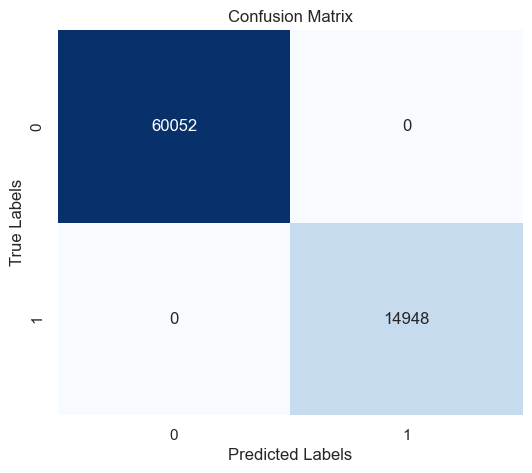

ValueError: y_true takes value in {0, 2} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

In [18]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of logistic regression model: {accuracy * 100:.2f}%")

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# ROC-AUC score
roc_auc = roc_auc_score(y_test, logistic_model.predict_proba(X_test_scaled)[:, 1])
print(f"ROC-AUC Score: {roc_auc:.2f}")

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, logistic_model.predict_proba(X_test_scaled)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f"Logistic Regression (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


Decision tree

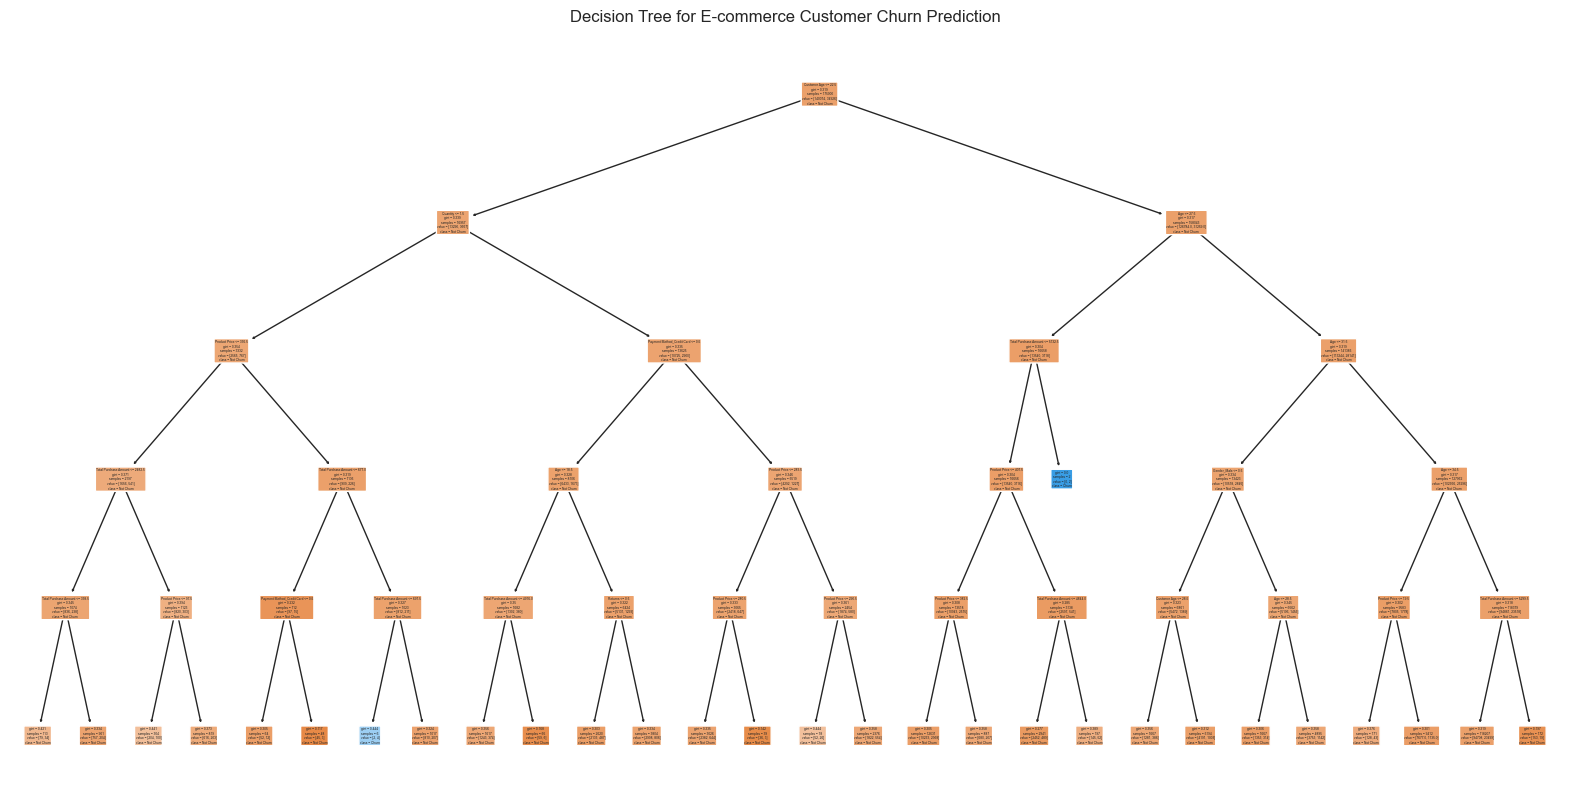

Accuracy of decision tree model: 80.06666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89     60052
           1       0.00      0.00      0.00     14948

    accuracy                           0.80     75000
   macro avg       0.40      0.50      0.44     75000
weighted avg       0.64      0.80      0.71     75000



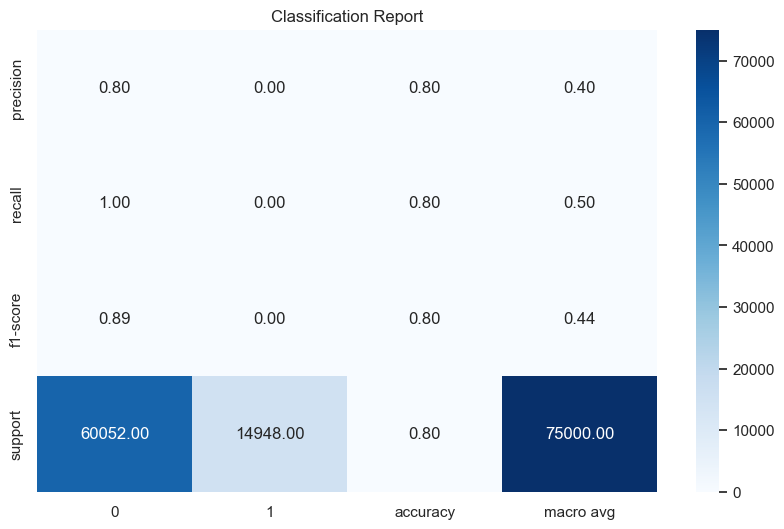

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'ecommerce_customer_data_custom_ratios.csv.zip'
data = pd.read_csv(file_path)

# Define the target variable and features
target_column = 'Churn'
features = data.drop(columns=[target_column, 'Customer ID', 'Customer Name', 'Purchase Date'])

# Handle categorical variables using Label Encoding or One-Hot Encoding
for column in features.select_dtypes(include=['object']).columns:
    if features[column].nunique() <= 10:  # If low unique values, one-hot encoding
        features = pd.get_dummies(features, columns=[column], drop_first=True)
    else:  # Label encoding for higher cardinality
        features[column] = LabelEncoder().fit_transform(features[column])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, data[target_column], test_size=0.3, random_state=42)

# Initialize and train the Decision Tree Classifier with limited depth
clf = DecisionTreeClassifier(random_state=42, max_depth=5)
clf.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=features.columns, class_names=["Not Churn", "Churn"], rounded=True)
plt.title("Decision Tree for E-commerce Customer Churn Prediction")
plt.show()

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of decision tree model:", accuracy*100)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate the classification report as a dictionary
report = classification_report(y_test, y_pred, output_dict=True)

# Convert the classification report into a DataFrame
report_df = pd.DataFrame(report).transpose()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap="Blues", fmt=".2f")  # Exclude 'accuracy' row
plt.title("Classification Report")
plt.show()




import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Load the dataset
dataset = pd.read_csv('ecommerce_customer_data_custom_ratios.csv.zip')

# Convert 'Purchase Date' to datetime and then to numeric (timestamp)
dataset['Purchase Date'] = pd.to_datetime(dataset['Purchase Date'])
dataset['Purchase Date'] = dataset['Purchase Date'].astype(np.int64) // 10**9  # Convert to seconds since epoch

# Handle categorical variables (e.g., encoding)
dataset = pd.get_dummies(dataset, columns=['Product Category', 'Payment Method', 'Gender'], drop_first=True)

# Select features and target variable
X = dataset.drop(columns=['Customer ID', 'Purchase Date', 'Customer Name', 'Churn'])
y = dataset(['Customer ID', 'Purchase Date', 'Customer Name', 'Churn'])

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fit the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model (confusion matrix, accuracy, etc. as before)


In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors

# Fit the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


TypeError: Cannot cast PeriodArray to dtype float64